*<font style='color:red'>CH2. 한글 형태소 분석</font>*
# 1. 자연어처리
- 자연어 : 일상적인 언어
- 자연어 처리 분야 : 
    * 자연어 이해 : 형태소분석 -> postagging -> 의미분석
    * 자연어 생성 : RNN, LSTM, GRU, ..., encoder-decoder 알고리즘 -> 트랜스포머알고리즘
- 활용분야 : 트랜드분석, 탐색적분석, 맞춤법검사, 번역기, 챗봇

# 2. 자연어 이해 처리 절차
- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 품사태깅(pos tagging)
- 제약조건(불용어 처리) : 규칙 확인
- 분석 : 시각화(워드클라우드), 연관분석, RNN, LSTM, GRU, ...

# 3. 한글 형태소 분석 에진(Konlpy, ...)
- 공통기능 : morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사태그)

- Konlpy (pip install konlpy)
    * HanNanum : 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, Path설정)
    * Kkma     : 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, Path설정)
    * Komoran  : 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, Path설정)
    * Okt      :

- Mecab (pip install python-mecab-ko)
    * MeCab : C++로 만든 형태소 분석기. 저사양환경에서 사용 가능. 다국어 바인딩 지원

In [1]:
import os
os.environ.get('JAVA_HOME')

'C:\\Program Files\\Java\\jdk-17'

In [2]:
text = '''아름답지만 다소 복잡하기도 한 한국어는 전세계에서 
13번째로 많이 사용되는 언어입니다'''

## 3.1 HanNanum

In [4]:
from konlpy.tag import Hannanum
hannanum = Hannanum(max_heap_size=1024) # 기본값 : 1024, '10m', '1g', 최대사이즈 4g
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [ ]:
print(hannanum.nouns(text)) # 명사 추출

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [5]:
print(hannanum.pos(text, ntags=22)) # 품사갯수 기본값 ntags=9

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF')]


In [14]:
# 퀴즈 1. text에서 형용사(pa)만 추출
[word[0] for word in hannanum.pos(text, ntags=22) if word[1]=='PA']

['아름답', '많']

In [ ]:
# 퀴즈 2. text에서 명사만 추출
[word[0] for word in hannanum.pos(text, ntags=9) if word[1]=='N']
[word[0] for word in hannanum.pos(text, ntags=22) if word[1] in ('NC','NQ','NB','NN','NP')]

['복잡', '한국어', '전세계', '13', '번', '사용', '언어']

In [ ]:
# 퀴즈 3. text에서 보통명사(NC)만 추출
[word[0] for word in hannanum.pos(text, ntags=22) if word[1]=='NC']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.2 Kkma

In [21]:
from konlpy.tag import Kkma
kkma = Kkma(max_heap_size=1024) # '4m', '4g'
print(kkma.morphs(text)) # 형태소 분석

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [ ]:
print(kkma.nouns(text)) # 명사추출

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [ ]:
# 품사 태깅
print(kkma.pos(text)) # ntags 지정 불가 kkma는 56 밖에 없음

In [24]:
# 명사 추출
tagged_text = kkma.pos(text)
print([token for token, tag in tagged_text if tag in ('NNG','NNP','NNB','NNM','NR','NP')])

['복잡', '한국어', '전세계', '13', '번째', '사용', '언어']


In [25]:
# 보통명사(NNG) + 고유명사(NNP)
print([token for token, tag in tagged_text if tag in ('NNG','NNP')])

['복잡', '한국어', '전세계', '사용', '언어']


## 3.3 Komoran

In [26]:
from konlpy.tag import Komoran
komoran = Komoran()
print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [27]:
# 명사 추출
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [29]:
# 품사 태깅
print(komoran.pos(text)) # ntags 조정 불가

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [30]:
# 품사 태깅
print(komoran.pos(text)) # ntags 조정 불가

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [32]:
# 일반명사, 고유명사만 추출
[token for token, tag in komoran.pos(text) if tag in ('NNG','NNP')]

['한국어', '전', '세계', '사용', '언어']

## 3.4 Okt(Open Korean Text)
- konlpy v0.4.5부터 Twitter-> Okt로 바뀜

In [58]:
import konlpy
konlpy.__version__

'0.6.0'

In [45]:
from konlpy.tag import Okt
okt = Okt(max_heap_size=1024)
print('구 추출 :', okt.phrases(text))
print('형태소 추출 :', okt.morphs(text))
print('명사 추출 :', okt.nouns(text))
print('품사 태깅을 이용한 명사 추출 :',[token for token, tag in okt.pos(text) if tag == 'Noun'])
print('품사 태깅 :', okt.pos(text))

구 추출 : ['다소', '한국어', '전세계', '13번째', '사용', '사용되는 언어', '13', '번째', '언어']
형태소 추출 : ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째', '로', '많이', '사용', '되는', '언어', '입니다']
명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅 : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective')]


## 3.5 Mecab
- pip install python-mecab-ko

In [57]:
from mecab import MeCab
mecab = MeCab() # 힙메모리 사이즈 지정 X
print('형태소 추출 :', mecab.morphs(text))
print('명사 추출 :', mecab.nouns(text))
tagged_text = mecab.pos(text) # ntags 조정 불가 (ntags=43 고정)
print('품사 태깅을 이용한 명사 추출 :',
      [token for token, tag in tagged_text if tag in ('NNG','NNP','NNBC','NR','NP')]
      )
print('품사 태깅 :', tagged_text)

형태소 추출 : ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다']
명사 추출 : ['한국어', '세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 : ['한국어', '세계', '번', '사용', '언어']
품사 태깅 : [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EC')]


# 4. 말뭉치

In [ ]:
# 영어 말뭉치
import nltk
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')

'[Emma by J'

In [61]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [110]:
# 한글 말뭉치
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt') # 한줄씩 List로 반환
data = data.read()
print('글자수 :', len(data))


글자수 : 18884


# 5. 워드 클라우드
- pip install wordcloud

In [ ]:
# 말뭉치에서 단어추출(특수 문자 제외)
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
ret = RegexpTokenizer('[a-zA-Z]{2,}')
words = ret.tokenize(emma)
# 명사만 추출
emma_tags = pos_tag(words)
nouns_list = [token for token, tag in emma_tags if tag in ('NN','NNS')]

추출된 명사 갯수 : 22336 	단어 종류수 : 3452


In [ ]:
print('추출된 명사 갯수 :',len(nouns_list), '\t단어 종류수 :', len(set(nouns_list)))
print('nouns_list :', nouns_list[:10])
emma_noun = ' '.join(nouns_list)
print('워드 클라우드에 필요한 내용 :', emma_noun[:100])

추출된 명사 갯수 : 22336 	단어 종류수 : 3452
nouns_list : ['Emma', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world', 'daughters', 'indulgent']
워드 클라우드에 필요한 내용 : Emma clever home disposition blessings existence years world daughters indulgent father consequence 


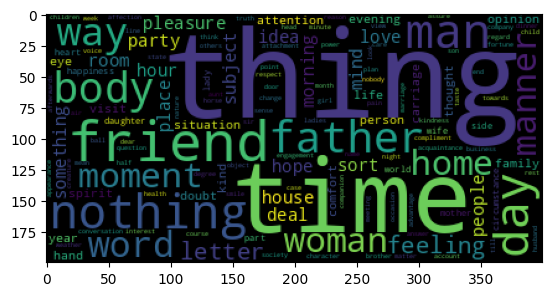

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordc = WordCloud()
wordc.generate(emma_noun)
plt.imshow(wordc,cmap='gray')

(-0.5, 399.5, 199.5, -0.5)

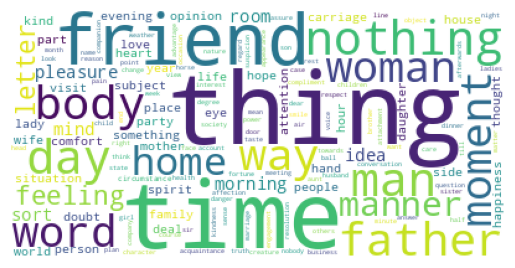

In [ ]:
Wordcloud = WordCloud(width=400, # 생성될 이미지 가로(픽셀)
                      height=200, # 생성될 이미지 세로(픽셀)
                      background_color='white', # 배경색
                      max_words=300, # 최대로 표시될 단어개수
                      relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조정
                      colormap='viridis', # 글씨 컬러맵
                      max_font_size=80,    # 최대 폰트 사이즈
                      min_font_size=10     # 최소 폰트 사이즈
                      )
Wordcloud.generate(emma_noun)
plt.imshow(Wordcloud)
plt.axis('off')

In [120]:
# 한글 말뭉치 data로 워드클라우드 시각화
from konlpy.tag import Komoran
analyzer = Komoran()
noun_list = analyzer.nouns(data)
data_noun = ' '.join(noun_list)
data_noun[:100]

'대한민국 헌법 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주개혁 평화 통일 사명 입각 정의 인도 동포애 민족 단결 사회 폐습 불의 타파 '

In [153]:
# 불용어 처리(불용어지정 + 불용어사전)
from wordcloud import STOPWORDS
불용어 = STOPWORDS | {'대통령','법률'} # | : 집합 합연산자
불용어 = {'대통령','법률','바','안','장','수','때'}

(-0.5, 399.5, 199.5, -0.5)

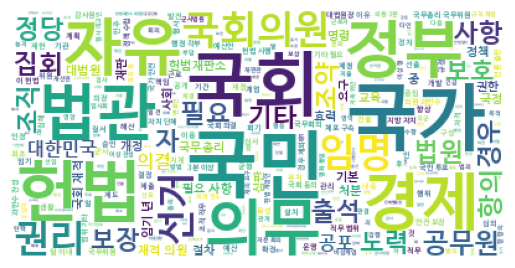

In [157]:
Wordcloud = WordCloud(width=400, # 생성될 이미지 가로(픽셀)
                      height=200, # 생성될 이미지 세로(픽셀)
                      background_color='white', # 배경색
                      max_words=300, # 최대로 표시될 단어개수
                      relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조정
                      colormap='viridis', # 글씨 컬러맵
                      max_font_size=60,    # 최대 폰트 사이즈
                      min_font_size=1,     # 최소 폰트 사이즈
                      font_path='C:\\Windows\\Fonts\\한컴 고딕\\Hancom Gothic Bold.ttf',
                      stopwords=불용어
                      )
Wordcloud.generate(data_noun)
plt.imshow(Wordcloud)
plt.axis('off')

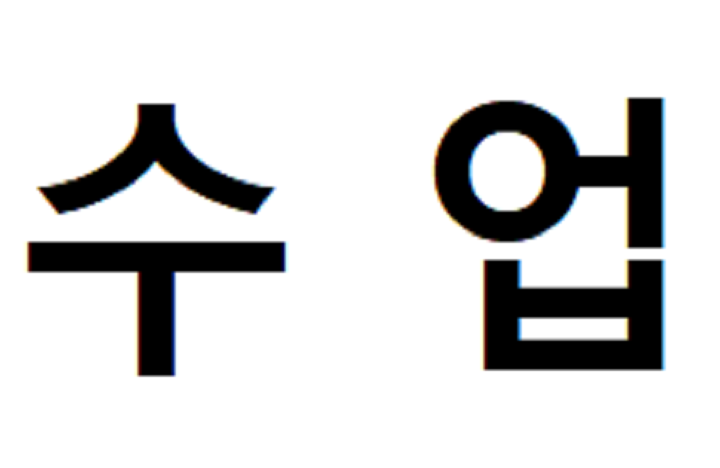

In [173]:
# 마스킹 : 워드클라우드를 지정된 마스크 이미지에 맞도록 설정
# 이미지를 넘파이 배열로 방법1
from PIL import Image
img = Image.open('data/test.png')
img

(1124, 720, 3)

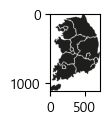

In [170]:
# 이미지를 넘파이 배열로 방법2
import cv2
mask = cv2.imread('data/south_korea.png'
                  #, cv2.IMREAD_GRAYSCALE
                  )
plt.figure(figsize=(2,1))                  
plt.imshow(mask)
mask.shape

(-0.5, 719.5, 1123.5, -0.5)

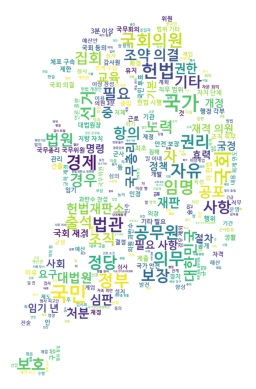

In [171]:
Wordcloud = WordCloud(width=400, # 생성될 이미지 가로(픽셀)
                      height=200, # 생성될 이미지 세로(픽셀)
                      background_color='white', # 배경색
                      max_words=300, # 최대로 표시될 단어개수
                      relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조정
                      colormap='viridis', # 글씨 컬러맵
                      max_font_size=60,    # 최대 폰트 사이즈
                      min_font_size=1,     # 최소 폰트 사이즈
                      font_path='C:\\Windows\\Fonts\\한컴 고딕\\Hancom Gothic Bold.ttf',
                      stopwords=불용어,
                      mask=mask
                      )
Wordcloud.generate(data_noun)
plt.imshow(Wordcloud)
plt.axis('off')

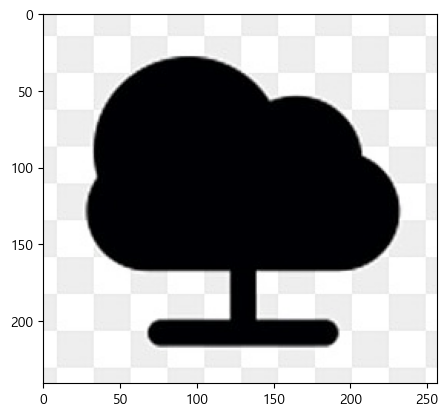

In [ ]:
test2 = cv2.imread('data/test2.jpg')
test2.shape
plt.imshow(test2)

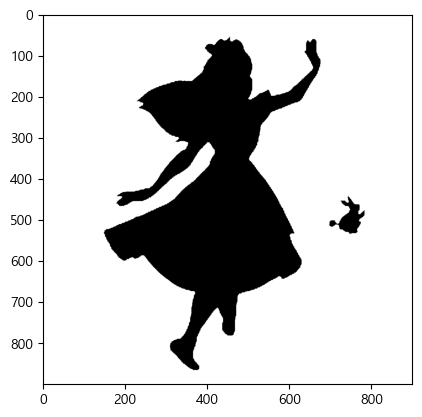

In [182]:
test3 = cv2.imread('data/test3.png')
test3.shape
plt.imshow(test3)

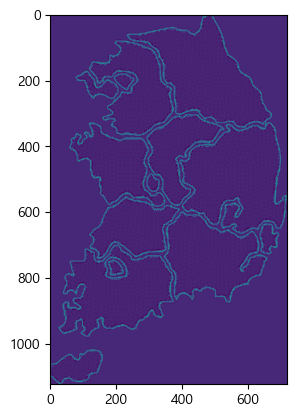

In [185]:
import numpy as np
test4 = cv2.imread('data/south_korea.png')
img = Image.open('data/south_korea.png')
test4 = np.array(img)
test4.shape
plt.imshow(test4)

(-0.5, 719.5, 1123.5, -0.5)

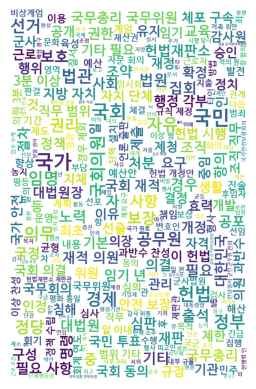

In [186]:
Wordcloud = WordCloud(width=400, # 생성될 이미지 가로(픽셀)
                      height=200, # 생성될 이미지 세로(픽셀)
                      background_color='white', # 배경색
                      max_words=300, # 최대로 표시될 단어개수
                      relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조정
                      colormap='viridis', # 글씨 컬러맵
                      max_font_size=60,    # 최대 폰트 사이즈
                      min_font_size=1,     # 최소 폰트 사이즈
                      font_path='C:\\Windows\\Fonts\\한컴 고딕\\Hancom Gothic Bold.ttf',
                      stopwords=불용어,
                      mask=test4
                      )
Wordcloud.generate(data_noun)
plt.imshow(Wordcloud)
plt.axis('off')

In [190]:
# convert('RGB') : 1채널이미지 -> 3채널
# convert('RGBA') : 1채널이미지 -> 4채널(RGB+투명도채널)
img = Image.open('data/south_korea.png').convert('RGB')
test4 = np.array(img)
test4.shape

(1124, 720, 3)

(-0.5, 719.5, 1123.5, -0.5)

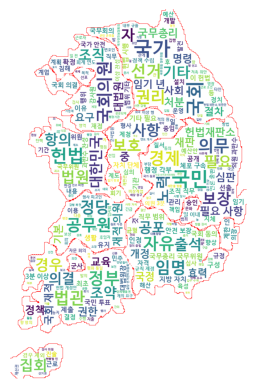

In [ ]:
Wordcloud = WordCloud(width=400, # 생성될 이미지 가로(픽셀)
                      height=200, # 생성될 이미지 세로(픽셀)
                      background_color='white', # 배경색
                      max_words=300, # 최대로 표시될 단어개수
                      relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조정
                      colormap='viridis', # 글씨 컬러맵
                      max_font_size=60,    # 최대 폰트 사이즈
                      min_font_size=1,     # 최소 폰트 사이즈
                      font_path='C:\\Windows\\Fonts\\한컴 고딕\\Hancom Gothic Bold.ttf',
                      stopwords=불용어,
                      mask=test4,
                      contour_color='red',
                      contour_width=1
                      )
Wordcloud.generate(data_noun)
plt.imshow(Wordcloud)
plt.axis('off')

In [194]:
Wordcloud.to_file('data/wordcloud.png')

## 단어의 빈도수 시각화(nltk.Text)

In [203]:
불용어 = {'법률','대통령'}

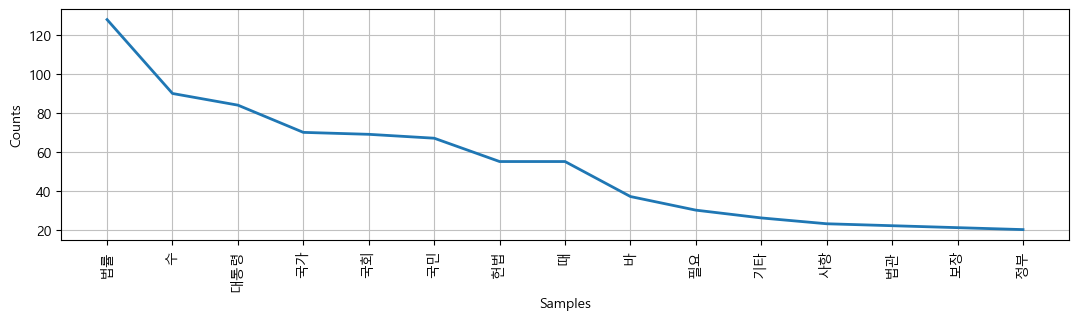

<Axes: xlabel='Samples', ylabel='Counts'>

In [207]:
import nltk
data_text = nltk.Text(noun_list)
plt.figure(figsize=(13,3))
plt.rc('font', family='Malgun Gothic')
data_text.plot(15)

In [211]:
# 단어의 빈도수 시각화(nltk.Text)
word, counts = zip(*data_text.vocab().most_common(15))
print(word)
print(counts)

('법률', '수', '대통령', '국가', '국회', '국민', '헌법', '때', '바', '필요', '기타', '사항', '법관', '보장', '정부')
(128, 90, 84, 70, 69, 67, 55, 55, 37, 30, 26, 23, 22, 21, 20)


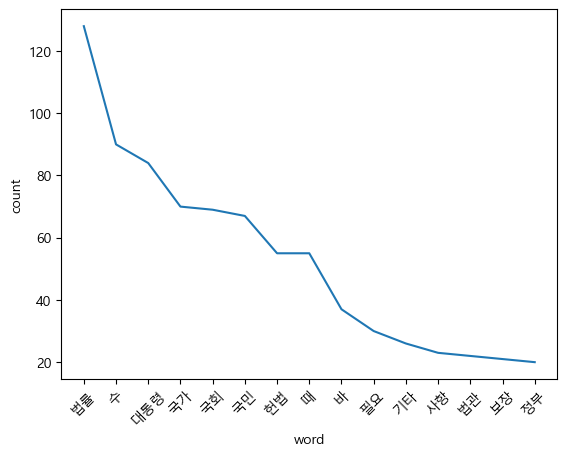

In [215]:
plt.plot(word, counts)
plt.xticks(rotation=45)
plt.xlabel('word')
plt.ylabel('count')
plt.show()

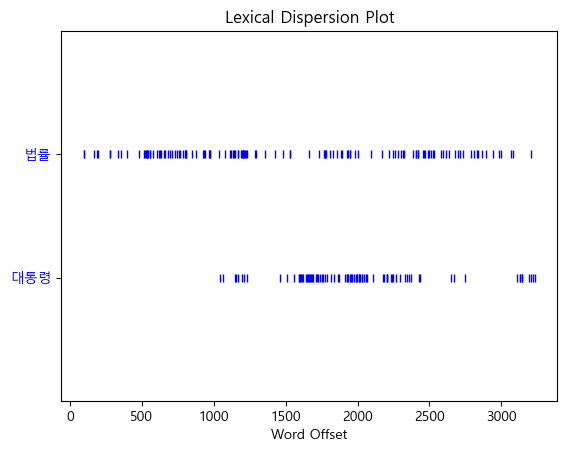

In [216]:
data_text.dispersion_plot(['법률','대통령'])

# 6. 워드 임베딩
- 단어간 벡터 계산 -> 단어간 유사성 도출 

In [238]:
import requests
from bs4 import BeautifulSoup
rss_url = 'https://fs.jtbc.co.kr/RSS/economy.xml'
jtbc_response = requests.get(rss_url)
jtbc_response
soup = BeautifulSoup(jtbc_response.content, 'xml')
link_el = soup.select('item > link')
link_list = [link.text for link in link_el]
link_list

['https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220943',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220949',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220832',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220765',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220766',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220665',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220651',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220627',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220516',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220366',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220365',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220169',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220180',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12219888',
 'https://news.jtbc.co.kr/article/article.aspx?n

In [256]:
from konlpy.tag import Kkma
kkma = Kkma()
news = []
for link in link_list:
    response = requests.get(link)
    news_soup = BeautifulSoup(response.content, 'html.parser')
    title = news_soup.select_one('title').text 
    description = str(news_soup.select_one('meta[name=description]'))
    noun_list = kkma.nouns(title + ' ' + description)
    불용어 = {'뉴스','앵커'}
    noun_list = [token for token in noun_list if token not in 불용어]
    news.append(noun_list)
news

[['촌',
  '촌주공',
  '주공',
  '전',
  '홍수',
  '예상',
  '눈치',
  '눈치게임',
  '게임',
  '시작',
  '단군',
  '이래',
  '최대',
  '규모',
  '건축',
  '불리',
  '아파트',
  '입주',
  '다음',
  '말',
  '대규모',
  '전세',
  '전세매물',
  '매물',
  '현장'],
 ['실제',
  '완전',
  '사기',
  '캠핑',
  '캠핑장',
  '장',
  '관리',
  '소홀',
  '예약',
  '때',
  '플랫폼',
  '사진',
  '기대',
  '당황',
  '분'],
 ['요즘',
  '끼',
  '편의점',
  '정도',
  '정도일',
  '일',
  '줄',
  '2',
  '2만',
  '만',
  '원',
  '육박',
  '점심',
  '점심값',
  '값',
  '도시락',
  '때',
  '7000',
  '7000원',
  '식비',
  '부담'],
 ['오늘',
  '겠다',
  '말',
  '이유',
  '편의점',
  '도시락',
  '7',
  '7천원',
  '천',
  '원',
  '시대',
  '주머니',
  '직장인',
  '자취생',
  '눈앞',
  '아람',
  '기자'],
 ['경영권',
  '분쟁',
  '주',
  '표',
  '표대결',
  '대결',
  '로',
  '롤러',
  '롤러코스터',
  '코스터',
  '고려',
  '고려아연',
  '아연',
  '주가',
  '오늘',
  '28',
  '28일',
  '일',
  '장',
  '장중',
  '중',
  '15',
  '포인트',
  '말',
  '달',
  '이어진',
  '공개',
  '공개매수',
  '매수',
  '절차',
  '마무리',
  '뚜껑',
  '어보'],
 ['결혼',
  '돈',
  '걱정',
  '예비',
  '예비부부',
  '부부',
  '저출산',
  '문제지',
  '현실',
  '결혼식',
  '비용',
  '

In [5]:
# rss의 title과 description => 명사 추출 => 워드임베딩(단어간 거리 계산) => 특정 단어의 유사도
import requests
from bs4 import BeautifulSoup
from konlpy.tag import Kkma
kkma = Kkma(max_heap_size=1024)
rss_url = 'https://fs.jtbc.co.kr/RSS/economy.xml'
jtbc_response = requests.get(rss_url)
soup = BeautifulSoup(jtbc_response.content, 'xml')
news = []
item_elems = soup.find_all('item')
for item_elem in item_elems:
    title = item_elem.find('title').text
    description = item_elem.find('description').text
    article = title + ' ' + description.replace('[앵커]',' ')
    noun_list = kkma.nouns(article)
    noun_list = [token for token,tag in kkma.pos(article) if tag in ('NNG','NNP')]
    news.append(noun_list)
print(news[:3])

[['촌', '주공', '전', '홍수', '예상', '눈치', '게임', '시작', '단군', '이래', '최대', '규모', '건축', '불리', '촌', '주공', '아파트', '입주', '다음', '말', '시작', '대규모', '입주', '전세', '매물', '현장', '분위기', '이'], ['실제', '완전', '사기', '캠핑', '장', '관리', '소홀', '캠핑', '장', '예약', '때', '예약', '플랫폼', '사진', '실제', '불만', '경우', '앞', '예약', '플랫폼', '책임', '강화', '아람', '기자', '기자', '인터넷', '카페'], ['요즘', '끼', '편의점', '정도', '일', '줄', '육박', '점심', '값', '편의점', '도시락', '끼', '때', '편의점', '도시락', '식비', '부담', '아람', '기자', '기자', '서울', '한']]


In [ ]:
# 워드 임베딩 (단어간 거리 계산)
# pip install gensim
from gensim.models import Word2Vec
model = Word2Vec(news,      # 학습데이터 2차원
                 window=10, # 각 단어의 좌우 10개 단어를 학습 컨텐츠로 사용
                 min_count=2, # 학습데이터에서 2회 이상 등장한 단어만 학습
                 workers=-1  # 병렬철 core수. -1 : 모든 core(CPU core) 사용
                 )

In [28]:
model.wv.most_similar('기자')

[('가격', 0.18890605866909027),
 ('전', 0.18855659663677216),
 ('코스터', 0.18359005451202393),
 ('예산', 0.18345923721790314),
 ('김', 0.17804878950119019),
 ('내년', 0.16072483360767365),
 ('직전', 0.15974178910255432),
 ('아파트', 0.15923379361629486),
 ('실제', 0.15861040353775024),
 ('어제', 0.15196380019187927)]

In [26]:
model.wv.most_similar('아파트',topn=3)

[('아연', 0.2122785449028015),
 ('불리', 0.19188855588436127),
 ('매출', 0.16693152487277985)]